# Enter Student Name & ID

In [36]:
student_id = 400101691 #@param {type:"integer"}
student_name = "Kimia Fakheri" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101691
your name: Kimia Fakheri


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [37]:
import numpy as np

In [38]:
def myPCA(X, num_components):
    # Step 1: Standardize the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # Step 3: Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort eigenvectors by eigenvalues (in descending order)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select desired number of principal components
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Step 6: Transform the data
    transformed_data = np.dot(X_standardized, selected_eigenvectors)

    return transformed_data

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [39]:
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

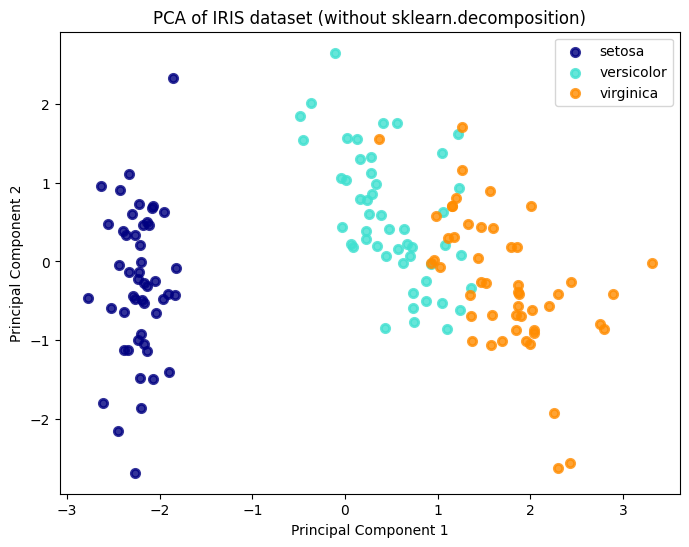

In [40]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 1: Standardize the data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort eigenvectors by eigenvalues (in descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select desired number of principal components (e.g., 2D)
num_components = 2
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

# Step 6: Transform the data
transformed_data = np.dot(X_standardized, selected_eigenvectors)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(transformed_data[iris.target == i, 0], transformed_data[iris.target == i, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset (without sklearn.decomposition)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `Eigenfaces are a set of eigenvectors derived from the covariance matrix of face image data. These eigenvectors represent the most significant features (or patterns) in a collection of face images. Here’s how they relate to PCA:

Principal Component Analysis (PCA):
PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible.
It identifies the principal components (eigenvectors) that capture the most important information in the data.
The first principal component explains the largest variance, the second explains the second-largest variance, and so on.
PCA is commonly used for feature extraction, noise reduction, and visualization.

Eigenfaces and Face Recognition:
Eigenfaces are the eigenvectors obtained from applying PCA to a dataset of face images.
Suppose we have a set of face images (each represented as a vector). We stack these vectors to form a matrix, where each row corresponds to an image.
The covariance matrix of this image matrix captures the relationships between different face features.
By performing eigendecomposition on the covariance matrix, we obtain the eigenvalues and eigenvectors.
The eigenvectors (or eigenfaces) represent characteristic facial features, such as lighting conditions, pose, and expressions.
The eigenvalues indicate the importance of each eigenface.
The top eigenfaces (those associated with the largest eigenvalues) correspond to the most significant variations in the face images.
These eigenfaces can be used for tasks like face recognition, reconstruction, and generation.

Face Reconstruction using Eigenfaces:
To reconstruct a face image, we can use a linear combination of the top eigenfaces.
Given a new face image, we project it onto the eigenface space (using the eigenvectors).
The coefficients of this projection represent how much each eigenface contributes to the original image.
By combining the eigenfaces with their corresponding coefficients, we reconstruct the face image.
Eigenfaces allow us to represent faces efficiently with fewer dimensions (e.g., using only the top k eigenfaces).

In summary, eigenfaces are a powerful representation of face images, obtained through PCA. They provide a compact and informative way to analyze and manipulate facial data, making them valuable for face recognition systems and related applications.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [63]:
pip install opencv-python

In [67]:
import zipfile
import cv2
import numpy as np
import os

# Ensure OpenCV is installed
try:
    import cv2
except ImportError:
    print("OpenCV not found. Please install it using: pip install opencv-python")

# Specify the path to the zip file
zip_file_path = '/content/FacesDataset1.zip'

# Directory to extract images
extract_folder = '/content/FacesDataset1/ORL'

# Create a ZipFile object in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents
    zip_ref.extractall(extract_folder)

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    if os.path.exists(folder):
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    else:
        print(f"Folder '{folder}' not found.")
    return images

# Initialize lists to hold training and test data
X_train = []
X_test = []
y_train = []
y_test = []

# Iterate over each person's folder
for person_id in range(1, 41):  # Assuming there are 40 people in the dataset
    person_folder = os.path.join(extract_folder, f's{person_id}')
    if not os.path.exists(person_folder):
        print(f"Folder '{person_folder}' not found. Skipping...")
        continue

    images = load_images_from_folder(person_folder)

    # Ensure we have at least 10 images for each person
    if len(images) < 10:
        print(f"Skipping s{person_id} due to insufficient images.")
        continue

    # Split the images into train and test
    X_train.extend(images[:5])  # First 5 images for training
    X_test.extend(images[5:10])  # Next 5 images for testing

    # Assign labels for train and test
    y_train.extend([person_id] * 5)  # Label 1 to 5 for training images
    y_test.extend([person_id] * 5)   # Label 1 to 5 for testing images

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (200, 48, 48)
X_test shape: (200, 48, 48)
y_train shape: (200,)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [68]:
import zipfile
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ensure OpenCV is installed
try:
    import cv2
except ImportError:
    print("OpenCV not found. Please install it using: pip install opencv-python")

# Specify the path to the zip file
zip_file_path = '/content/FacesDataset1.zip'

# Directory to extract images
extract_folder = '/content/FacesDataset1/'

# Create a ZipFile object in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents
    zip_ref.extractall(extract_folder)

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    if os.path.exists(folder):
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    else:
        print(f"Folder '{folder}' not found.")
    return images

# Initialize lists to hold training and test data
X_train = []
X_test = []
y_train = []
y_test = []

# Iterate over each person's folder
for person_id in range(1, 41):  # Assuming there are 40 people in the dataset
    person_folder = os.path.join(extract_folder, f'ORL/s{person_id}')
    if not os.path.exists(person_folder):
        print(f"Folder '{person_folder}' not found. Skipping...")
        continue

    images = load_images_from_folder(person_folder)

    # Ensure we have at least 10 images for each person
    if len(images) < 10:
        print(f"Skipping s{person_id} due to insufficient images.")
        continue

    # Split the images into train and test
    X_train.extend(images[:5])  # First 5 images for training
    X_test.extend(images[5:10])  # Next 5 images for testing

    # Assign labels for train and test
    y_train.extend([person_id] * 5)  # Label 1 to 5 for training images
    y_test.extend([person_id] * 5)   # Label 1 to 5 for testing images

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Flatten the images into 1D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Perform PCA
pca = PCA(n_components=50)  # Choose the number of components (e.g., between 40 and 50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the explained variance ratio
print(f"Explained variance ratio by {pca.n_components} components: {np.sum(pca.explained_variance_ratio_)}")

# Print shapes after PCA
print(f'X_train_pca shape: {X_train_pca.shape}')
print(f'X_test_pca shape: {X_test_pca.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Explained variance ratio by 50 components: 0.9481105944530074
X_train_pca shape: (200, 50)
X_test_pca shape: (200, 50)
y_train shape: (200,)
y_test shape: (200,)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Initialize LDA classifier
lda = LDA()

# Fit LDA classifier on the PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict labels for training and test data
y_train_pred = lda.predict(X_train_pca)
y_test_pred = lda.predict(X_test_pca)

# Calculate accuracy score for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"Accuracy on training set: {train_accuracy:.2f}")
print(f"Accuracy on test set: {test_accuracy:.2f}")


Accuracy on training set: 1.00
Accuracy on test set: 0.94


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the range of PCA dimensions to test
pca_dimensions = range(100, 39, -10)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []

# Iterate over different PCA dimensions
for n_components in pca_dimensions:
    # Perform PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize LDA classifier
    lda = LDA()

    # Fit LDA on PCA-transformed training data
    lda.fit(X_train_pca, y_train)

    # Predict labels for training and test data
    y_train_pred = lda.predict(X_train_pca)
    y_test_pred = lda.predict(X_test_pca)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print results for each PCA dimension
    print(f"PCA Components: {n_components}\t Train Accuracy: {train_accuracy:.3f}\t Test Accuracy: {test_accuracy:.3f}")

# Convert lists to numpy arrays for plotting if needed
train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

PCA Components: 100	 Train Accuracy: 1.000	 Test Accuracy: 0.975
PCA Components: 90	 Train Accuracy: 1.000	 Test Accuracy: 0.965
PCA Components: 80	 Train Accuracy: 1.000	 Test Accuracy: 0.965
PCA Components: 70	 Train Accuracy: 1.000	 Test Accuracy: 0.955
PCA Components: 60	 Train Accuracy: 1.000	 Test Accuracy: 0.955
PCA Components: 50	 Train Accuracy: 1.000	 Test Accuracy: 0.950
PCA Components: 40	 Train Accuracy: 1.000	 Test Accuracy: 0.930


When deciding on the number of PCA components that are sufficient, we look for a point where increasing the number of components no longer significantly improves the accuracy of our model. This point represents a balance between capturing enough variance in the data to maintain good predictive performance and avoiding unnecessary complexity.

In practice, this optimal number varies depending on the specific dataset and the requirements of the problem at hand. It's often found through experimentation and validation, where we observe how accuracy changes with different numbers of PCA components.

Moreover, considerations such as computational efficiency also play a role. Too many components can lead to increased computational costs during training and inference. Therefore, we aim to select a number of features that provides a good compromise between model complexity and performance, ensuring our model remains effective and efficient.

In summary, the sufficient number of features is the one that achieves a balance between model accuracy, computational feasibility, and practical application needs for the specific task and dataset.